In [1]:
import pandas as pd

datafile = pd.read_csv('creditcardcsvpresent.csv')
datafile.head()


,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [2]:
#preprocessing
datafile.loc[datafile["Is declined"] == "N", "Is declined"] = 0
datafile.loc[datafile["Is declined"] == "Y", "Is declined"] = 1

datafile.loc[datafile["isForeignTransaction"] == "N", "isForeignTransaction"] = 0
datafile.loc[datafile["isForeignTransaction"] == "Y", "isForeignTransaction"] = 1

datafile.loc[datafile["isHighRiskCountry"] == "N", "isHighRiskCountry"] = 0
datafile.loc[datafile["isHighRiskCountry"] == "Y", "isHighRiskCountry"] = 1

datafile.loc[datafile["isFradulent"] == "N", "isFradulent"] = 0
datafile.loc[datafile["isFradulent"] == "Y", "isFradulent"] = 1

#type convert
df2 = datafile.apply(pd.to_numeric)

datafile.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,3160040998,NaN,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,3160041896,NaN,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,3160141996,NaN,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,3160241992,NaN,500.0,26000.0,0,0,1,1,800,677.2,6,1


In [3]:
df2.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,3160040998,NaN,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,3160041896,NaN,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,3160141996,NaN,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,3160241992,NaN,500.0,26000.0,0,0,1,1,800,677.2,6,1


In [4]:
datafile.dtypes

Merchant_id                         int64
Transaction date                  float64
Average Amount/transaction/day    float64
Transaction_amount                float64
Is declined                        object
Total Number of declines/day        int64
isForeignTransaction               object
isHighRiskCountry                  object
Daily_chargeback_avg_amt            int64
6_month_avg_chbk_amt              float64
6-month_chbk_freq                   int64
isFradulent                        object
dtype: object

In [5]:
df2.dtypes

Merchant_id                         int64
Transaction date                  float64
Average Amount/transaction/day    float64
Transaction_amount                float64
Is declined                         int64
Total Number of declines/day        int64
isForeignTransaction                int64
isHighRiskCountry                   int64
Daily_chargeback_avg_amt            int64
6_month_avg_chbk_amt              float64
6-month_chbk_freq                   int64
isFradulent                         int64
dtype: object


Bad key "text.kerning_factor" on line 4 in
C:\Users\WonjunChun\Anaconda3\envs\venv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


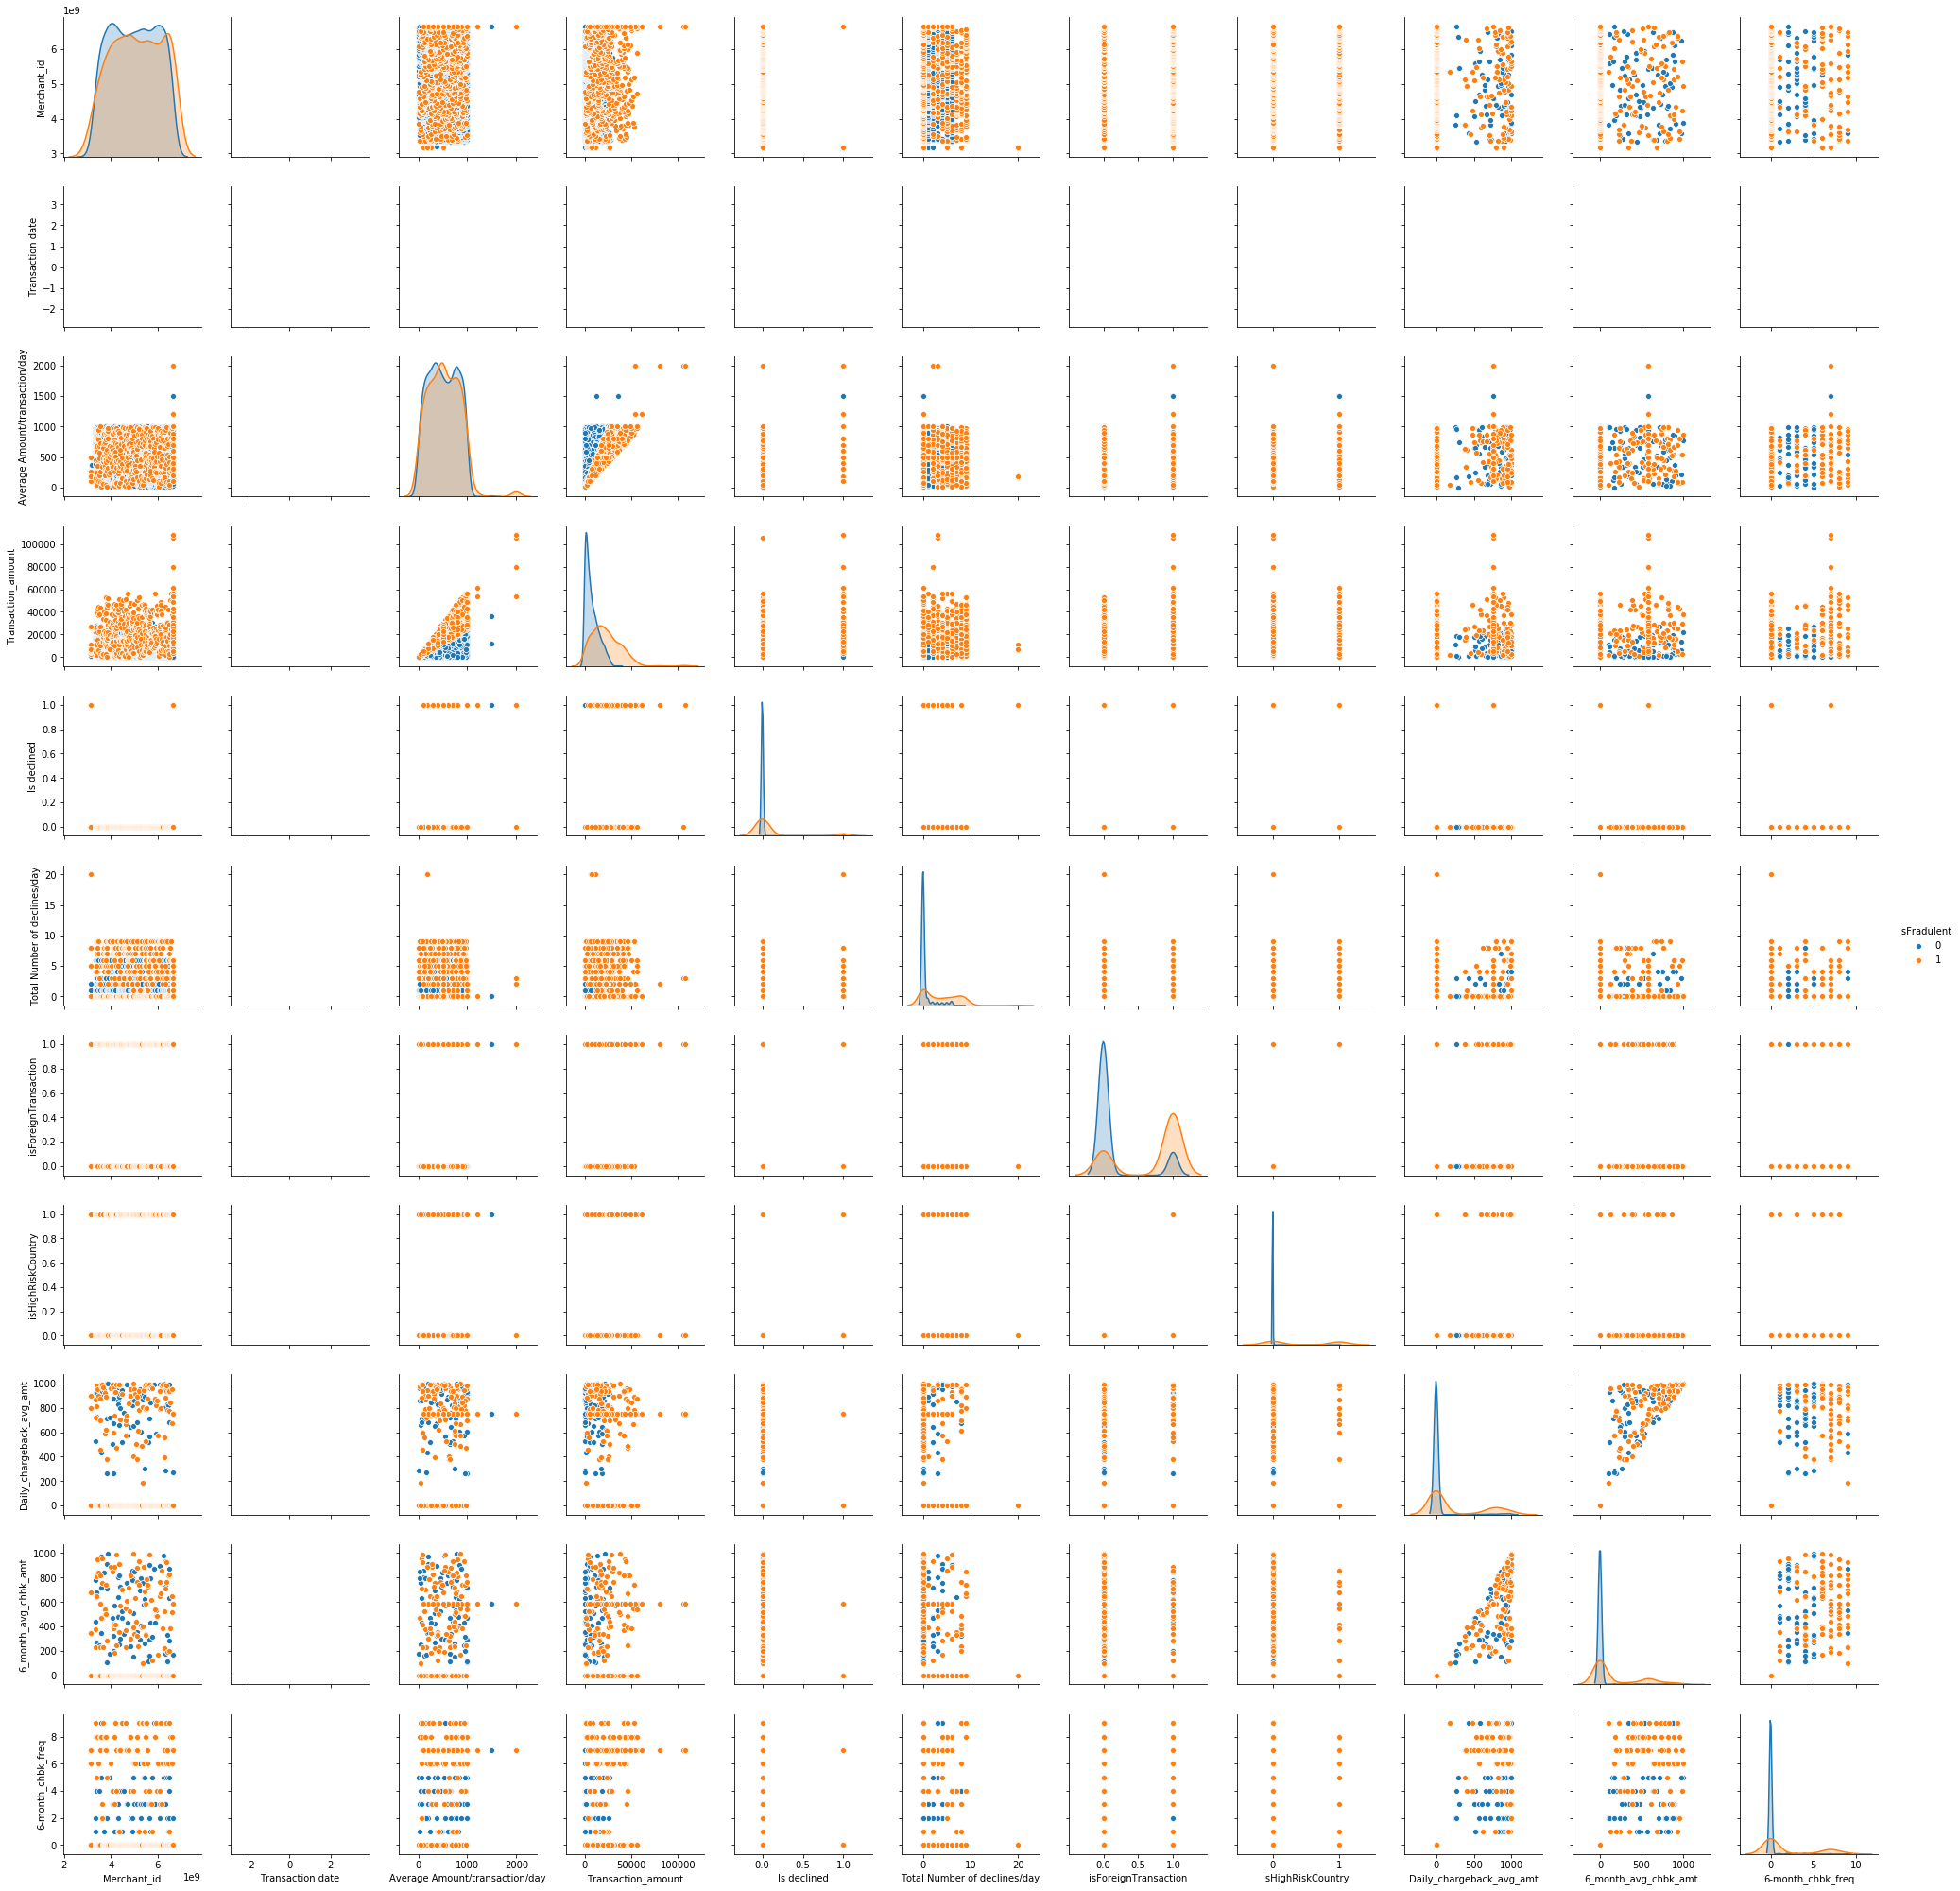

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns_plot = sns.pairplot(datafile, hue="isFradulent")
plt.show()

sns_plot.savefig('cardscam.png')

In [6]:
from sklearn.model_selection import train_test_split
X = df2[['Average Amount/transaction/day', 'Transaction_amount', 'Is declined', 'Total Number of declines/day', 
             'isForeignTransaction', 'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt', '6-month_chbk_freq']]

X2 = df2[['Average Amount/transaction/day', 'Transaction_amount']]
             
y = df2[['isFradulent']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, train_size=0.8, test_size=0.2)


In [8]:
#SVM
#model1 : all feature
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model1 = SVC(kernel='linear')
model1.fit(X_train, y_train)
print('model1 : All feature')

y1_train_hat = model1.predict(X_train)
print('train accuracy : ', accuracy_score(y_train, y1_train_hat))
y1_test_hat = model1.predict(X_test)
print('test accuracy : ', accuracy_score(y_test, y1_test_hat))

C:\Users\WonjunChun\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model1 : All feature
train accuracy :  0.9813008130081301
test accuracy :  0.9723577235772358


In [9]:
#model2 : two most significant feature

model2 = SVC(kernel='linear')
model2.fit(X2_train, y2_train)
print('model2 : two most significant feature')

y2_train_hat = model2.predict(X2_train)
print('train accuracy : ', accuracy_score(y2_train, y2_train_hat))
y2_test_hat = model2.predict(X2_test)
print('test accuracy : ', accuracy_score(y2_test, y2_test_hat))

C:\Users\WonjunChun\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model2 : two most significant feature
train accuracy :  0.9727642276422764
test accuracy :  0.9577235772357724



Bad key "text.kerning_factor" on line 4 in
C:\Users\WonjunChun\Anaconda3\envs\venv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\WonjunChun\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\WonjunChun\Anaconda3\envs\venv\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it woul

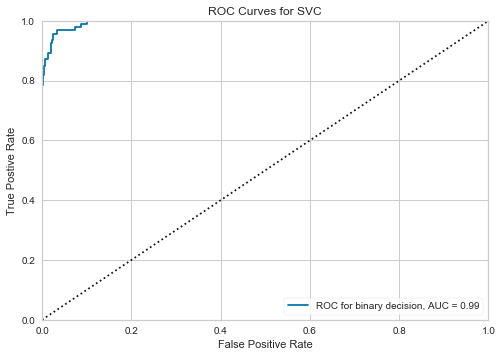

In [10]:
#ROC curve
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model1, classes=[0, 1], micro=False, macro=False, per_class=False)
visualizer.fit(X_test, y_test)
visualizer.score(X_test, y_test)
visualizer.show()

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y1_test_hat))
print('------------------------------------')
print(classification_report(y_test, y1_test_hat, target_names = ['N', 'Y']))

[[519   3]
 [ 14  79]]
------------------------------------
              precision    recall  f1-score   support

           N       0.97      0.99      0.98       522
           Y       0.96      0.85      0.90        93

    accuracy                           0.97       615
   macro avg       0.97      0.92      0.94       615
weighted avg       0.97      0.97      0.97       615



C:\Users\WonjunChun\Anaconda3\envs\venv\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


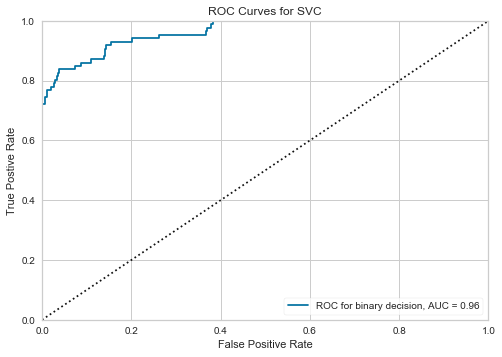

In [12]:
#model2 ROC curve
visualizer2 = ROCAUC(model2, classes=[0, 1], micro=False, macro=False, per_class=False)
visualizer2.fit(X2_test, y2_test)
visualizer2.score(X2_test, y2_test)
visualizer2.show()

In [13]:
#model2 confusion matrix
print(confusion_matrix(y2_test, y2_test_hat))
print('------------------------------------')
print(classification_report(y2_test, y2_test_hat, target_names = ['N', 'Y']))

[[527   2]
 [ 24  62]]
------------------------------------
              precision    recall  f1-score   support

           N       0.96      1.00      0.98       529
           Y       0.97      0.72      0.83        86

    accuracy                           0.96       615
   macro avg       0.96      0.86      0.90       615
weighted avg       0.96      0.96      0.96       615

